In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import random
import pickle
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import keras
import sys

Using TensorFlow backend.


In [3]:
with open('/home/sxz/data/geolife_Data/pseudo_data2.pickle', 'rb') as f:
     a1,b1 = pickle.load(f)

EOFError: Ran out of input

In [85]:
filename = '/home/sxz/data/geolife_Data/Encoded_data.pickle'
with open(filename, 'rb') as f:
    a1,b1 = pickle.load(f)

In [68]:
Train_X = a1[:int(0.8*len(a1))]

In [69]:
Train_Y_ori = b1[:int(0.8*len(b1))]

In [70]:
Test_X = a1[int(0.8*len(a1)):]

In [71]:
Test_Y_ori = b1[int(0.8*len(b1)):]

In [72]:
len(Test_X) - len(Test_Y)

0

In [73]:
Test_Y = np.zeros((len(Test_Y_ori),5))

In [74]:
for i in range(len(Test_Y_ori)):
    Test_Y[i][Test_Y_ori[i]] = 1
print(Test_Y_ori)
print(len(Test_Y_ori))
print(Train_Y_ori)
print(len(Train_Y_ori))

[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [75]:
Train_Y = np.zeros((len(Train_Y_ori),5))

In [76]:
for i in range(len(Train_Y_ori)):
    Train_Y[i][Train_Y_ori[i]] = 1
print(Train_Y)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [46]:
filename = '/home/sxz/data/geolife_Data/origin_data2.pickle'
with open(filename, 'rb') as f:
    encode_data, encode_label = pickle.load(f)
random_sample = np.random.choice(len(encode_data), size=round(2000),replace=False, p=None)
encode_data = encode_data[random_sample]
encode_label = encode_label[random_sample]

In [47]:
filename = '/home/sxz/data/geolife_Data/My_data_for_DL_kfold_dataset_RL.pickle'
with open(filename, 'rb') as f:
    kfold_dataset, X_unlabeled = pickle.load(f)
fold = kfold_dataset[0]
data_origin = fold[0]
data_origin = data_origin[random_sample]
print(np.shape(data_origin))

(2000, 1, 248, 4)


In [48]:
data_origin = data_origin.reshape(len(data_origin),len(data_origin[0][0])*len(data_origin[0][0][0]))
# print(len(encode_data[0][0]))
origin_pca = pca.fit_transform(data_origin)

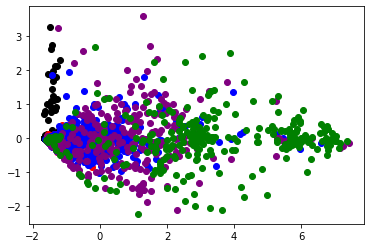

In [49]:
plt.plot(origin_pca[encode_label==0,0],origin_pca[encode_label==0,1],'o',color='black')
plt.plot(origin_pca[encode_label==1,0],origin_pca[encode_label==1,1],'o',color='red')
plt.plot(origin_pca[encode_label==2,0],origin_pca[encode_label==2,1],'o',color='blue')
plt.plot(origin_pca[encode_label==3,0],origin_pca[encode_label==3,1],'o',color='purple')
plt.plot(origin_pca[encode_label==4,0],origin_pca[encode_label==4,1],'o',color='green')

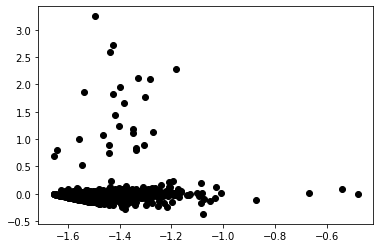

In [50]:
plt.plot(origin_pca[encode_label==0,0],origin_pca[encode_label==0,1],'o',color='black')

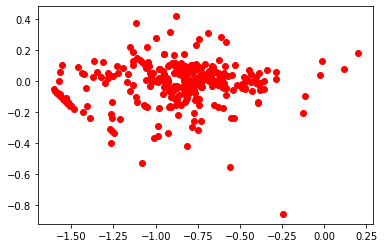

In [51]:
plt.plot(origin_pca[encode_label==1,0],origin_pca[encode_label==1,1],'o',color='red')

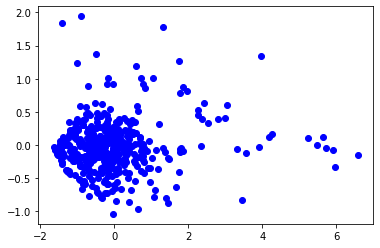

In [52]:
plt.plot(origin_pca[encode_label==2,0],origin_pca[encode_label==2,1],'o',color='blue')

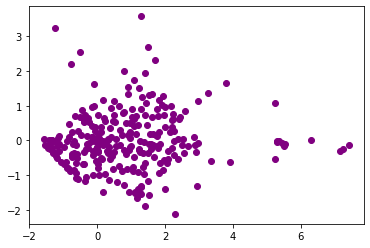

In [53]:
plt.plot(origin_pca[encode_label==3,0],origin_pca[encode_label==3,1],'o',color='purple')

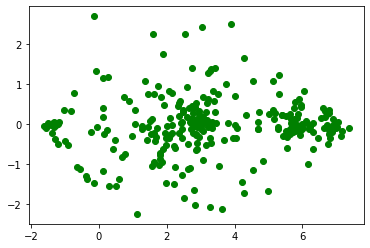

In [54]:
plt.plot(origin_pca[encode_label==4,0],origin_pca[encode_label==4,1],'o',color='green')

In [42]:
print(np.shape(encode_data))
print(np.shape(encode_label))

(2000, 7936)
(2000,)


In [24]:
pca = PCA(n_components = 2)
encode_data = encode_data.reshape(len(encode_data),len(encode_data[0][0])*len(encode_data[0][0][0]))
# print(len(encode_data[0][0]))
label_pca = pca.fit_transform(encode_data)

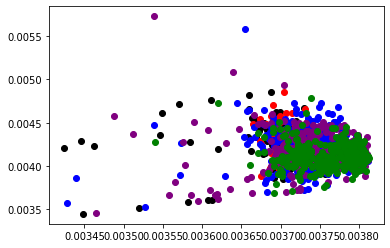

In [25]:
plt.plot(encode_data[encode_label==0,0],encode_data[encode_label==0,1],'o',color='black')
plt.plot(encode_data[encode_label==1,0],encode_data[encode_label==1,1],'o',color='red')
plt.plot(encode_data[encode_label==2,0],encode_data[encode_label==2,1],'o',color='blue')
plt.plot(encode_data[encode_label==3,0],encode_data[encode_label==3,1],'o',color='purple')
plt.plot(encode_data[encode_label==4,0],encode_data[encode_label==4,1],'o',color='green')
# plt.plot(encode_origin[:,0],encode_origin[:,1],'o',color='blue')

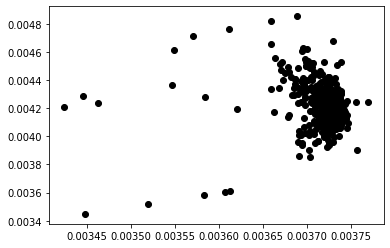

In [26]:
plt.plot(encode_data[encode_label==0,0],encode_data[encode_label==0,1],'o',color='black')

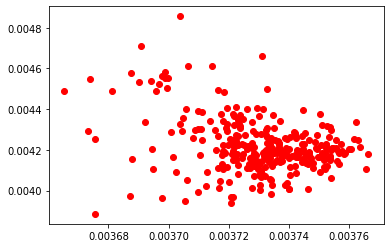

In [27]:
plt.plot(encode_data[encode_label==1,0],encode_data[encode_label==1,1],'o',color='red')

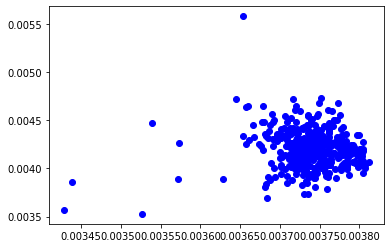

In [28]:
plt.plot(encode_data[encode_label==2,0],encode_data[encode_label==2,1],'o',color='blue')

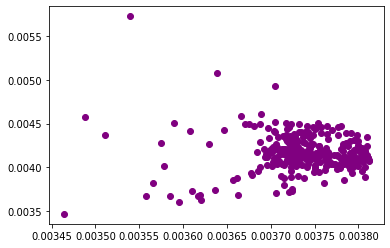

In [29]:
plt.plot(encode_data[encode_label==3,0],encode_data[encode_label==3,1],'o',color='purple')

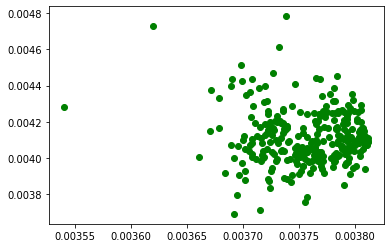

In [30]:
plt.plot(encode_data[encode_label==4,0],encode_data[encode_label==4,1],'o',color='green')

In [4]:
filename = '/home/sxz/data/geolife_Data/pseudo_data2.pickle'
with open(filename, 'rb') as f:
    Train_X, label_ ,encode, encode_origin = pickle.load(f)

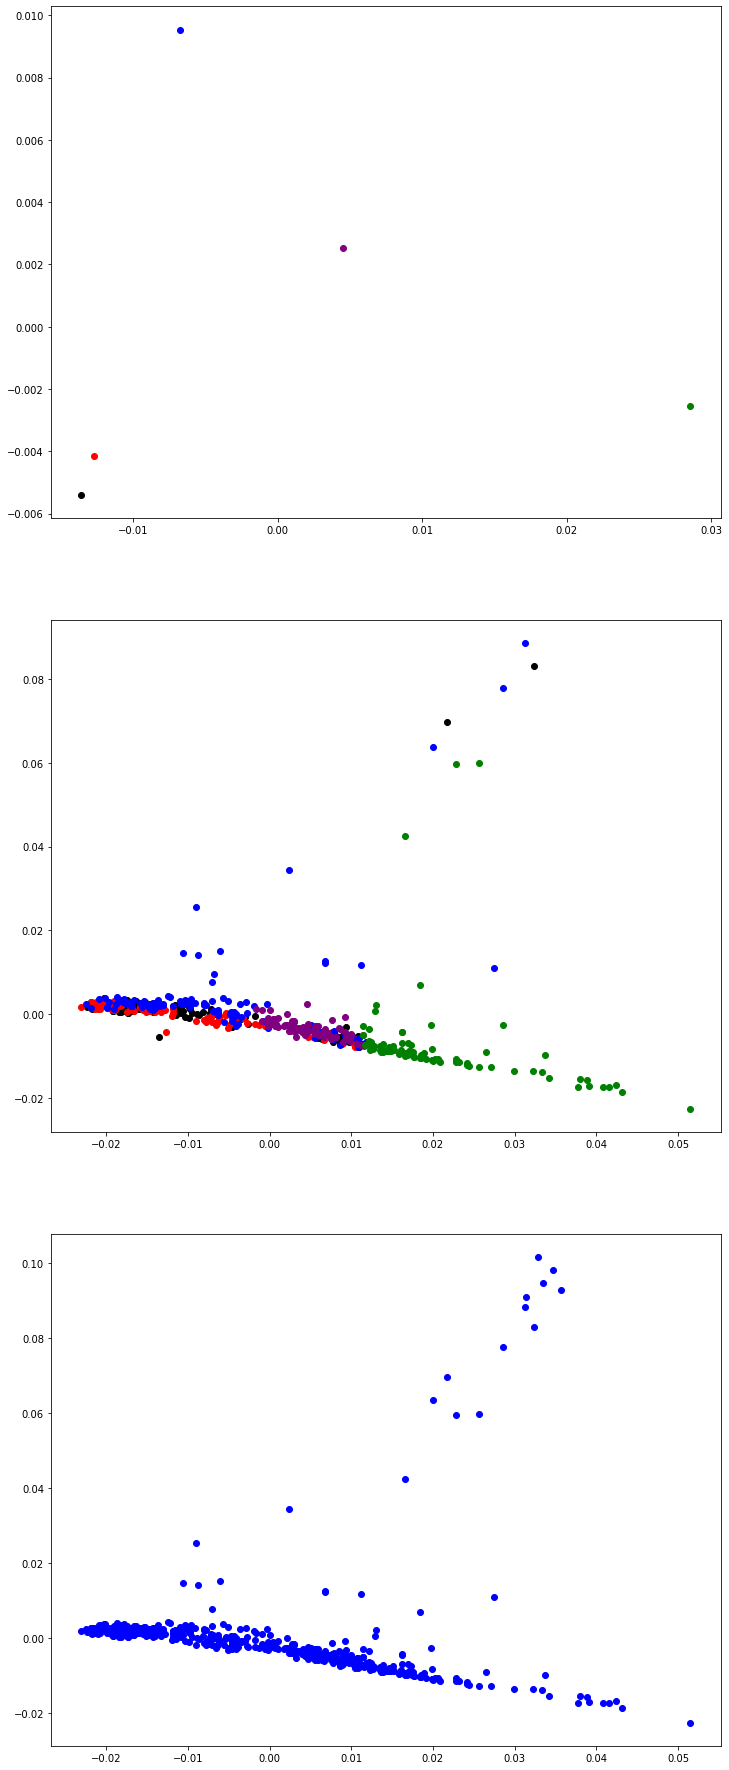

In [5]:
plt.figure(figsize=(12,32))
plt.subplot(3,1,1)
plt.plot(encode[label_==0,0][0],encode[label_==0,1][0],'o',color='black')
plt.plot(encode[label_==1,0][0],encode[label_==1,1][0],'o',color='red')
plt.plot(encode[label_==2,0][0],encode[label_==2,1][0],'o',color='blue')
plt.plot(encode[label_==3,0][0],encode[label_==3,1][0],'o',color='purple')
plt.plot(encode[label_==4,0][0],encode[label_==4,1][0],'o',color='green')
plt.subplot(3,1,2)
# print(unlabel_pca[label_==0,0])
plt.plot(encode[label_==0,0],encode[label_==0,1],'o',color='black')
plt.plot(encode[label_==1,0],encode[label_==1,1],'o',color='red')
plt.plot(encode[label_==2,0],encode[label_==2,1],'o',color='blue')
plt.plot(encode[label_==3,0],encode[label_==3,1],'o',color='purple')
plt.plot(encode[label_==4,0],encode[label_==4,1],'o',color='green')
plt.subplot(3,1,3)
plt.plot(encode_origin[:,0],encode_origin[:,1],'o',color='blue')

In [142]:
label_[label_ == 1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [178]:
label_

array([0, 4, 2, 3, 1, 2, 3, 1, 4, 0, 4, 1, 0, 3, 2, 2, 3, 4, 0, 1, 1, 3,
       0, 2, 3, 3, 4, 2, 2, 1, 2, 1, 3, 3, 2, 2, 0, 3, 4, 4, 3, 0, 4, 2,
       3, 2, 2, 1, 4, 2, 1, 3, 4, 2, 2, 4, 2, 1, 4, 4, 3, 4, 3, 4, 1, 4,
       2, 2, 3, 3, 4, 3, 4, 3, 3, 3, 2, 2, 2, 3, 2, 4, 0, 4, 2, 3, 4, 2,
       3, 4, 4, 2, 2, 4, 1, 3, 1, 4, 2, 2, 4, 2, 3, 3, 0, 2, 3, 2, 4, 1,
       3, 2, 4, 4, 3, 4, 2, 2, 3, 2, 2, 2, 4, 4, 2, 3, 2, 4, 2, 0, 0, 2,
       4, 4, 3, 1, 3, 2, 1, 1, 4, 0, 1, 2, 2, 1, 1, 3, 2, 3, 3, 4, 1, 4,
       2, 2, 1, 1, 1, 3, 1, 1, 3, 1, 2, 1, 3, 3, 4, 2, 0, 1, 3, 3, 4, 3,
       1, 2, 3, 4, 2, 3, 2, 4, 3, 3, 3, 3, 0, 4, 3, 0, 3, 2, 4, 0, 3, 2,
       3, 1, 4, 2, 3, 4, 3, 1, 1, 2, 3, 4, 3, 2, 0, 3, 1, 4, 4, 1, 3, 2,
       0, 2, 3, 3, 3, 3, 2, 2, 4, 3, 4, 1, 3, 3, 1, 3, 3, 1, 2, 4, 1, 2,
       4, 2, 2, 3, 2, 3, 1, 2, 3, 1, 1, 1, 3, 2, 3, 0, 1, 0, 2, 4, 2, 3,
       1, 3, 4, 4, 4, 2, 3, 3, 2, 4, 3, 4, 1, 3, 3, 1, 2, 1, 4, 2, 3, 2,
       4, 3, 2, 4, 2, 4, 3, 4, 4, 2, 3, 4, 0, 2, 4,

In [172]:
for i in range(len(label_[label_ == 4])):
    label_[label_ == 4] = 5

In [175]:
for i in range(len(label_[label_ == 1])):
    label_[label_ == 1] = 4

In [177]:
label_[label_ == 5] = 1

In [170]:
label_

array([0, 1, 2, 3, 4, 2, 3, 4, 1, 0, 1, 4, 0, 3, 2, 2, 3, 1, 0, 4, 4, 3,
       0, 2, 3, 3, 1, 2, 2, 4, 2, 4, 3, 3, 2, 2, 0, 3, 1, 1, 3, 0, 1, 2,
       3, 2, 2, 4, 1, 2, 4, 3, 1, 2, 2, 1, 2, 4, 1, 1, 3, 1, 3, 1, 4, 1,
       2, 2, 3, 3, 1, 3, 1, 3, 3, 3, 2, 2, 2, 3, 2, 1, 0, 1, 2, 3, 1, 2,
       3, 1, 1, 2, 2, 1, 4, 3, 4, 1, 2, 2, 1, 2, 3, 3, 0, 2, 3, 2, 1, 4,
       3, 2, 1, 1, 3, 1, 2, 2, 3, 2, 2, 2, 1, 1, 2, 3, 2, 1, 2, 0, 0, 2,
       1, 1, 3, 4, 3, 2, 4, 4, 1, 0, 4, 2, 2, 4, 4, 3, 2, 3, 3, 1, 4, 1,
       2, 2, 4, 4, 4, 3, 4, 4, 3, 4, 2, 4, 3, 3, 1, 2, 0, 4, 3, 3, 1, 3,
       4, 2, 3, 1, 2, 3, 2, 1, 3, 3, 3, 3, 0, 1, 3, 0, 3, 2, 1, 0, 3, 2,
       3, 4, 1, 2, 3, 1, 3, 4, 4, 2, 3, 1, 3, 2, 0, 3, 4, 1, 1, 4, 3, 2,
       0, 2, 3, 3, 3, 3, 2, 2, 1, 3, 1, 4, 3, 3, 4, 3, 3, 4, 2, 1, 4, 2,
       1, 2, 2, 3, 2, 3, 4, 2, 3, 4, 4, 4, 3, 2, 3, 0, 4, 0, 2, 1, 2, 3,
       4, 3, 1, 1, 1, 2, 3, 3, 2, 1, 3, 1, 4, 3, 3, 4, 2, 4, 1, 2, 3, 2,
       1, 3, 2, 1, 2, 1, 3, 1, 1, 2, 3, 1, 0, 2, 1,

In [180]:
with open('/home/sxz/data/geolife_Data/pseudo_data1.pickle', 'wb') as f:
    pickle.dump([Train_X, label_ ,encode, encode_origin], f)

In [189]:
filename = '/home/sxz/data/geolife_Data/pseudo_data1.pickle'
with open(filename, 'rb') as f:
    Train_X, label_ ,encode, encode_origin = pickle.load(f)
    


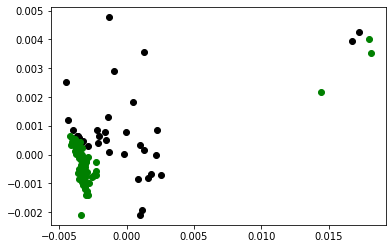

In [194]:
plt.plot(encode[label_==0,0],encode[label_==0,1],'o',color='black')
plt.plot(encode[label_==4,0],encode[label_==4,1],'o',color='green')

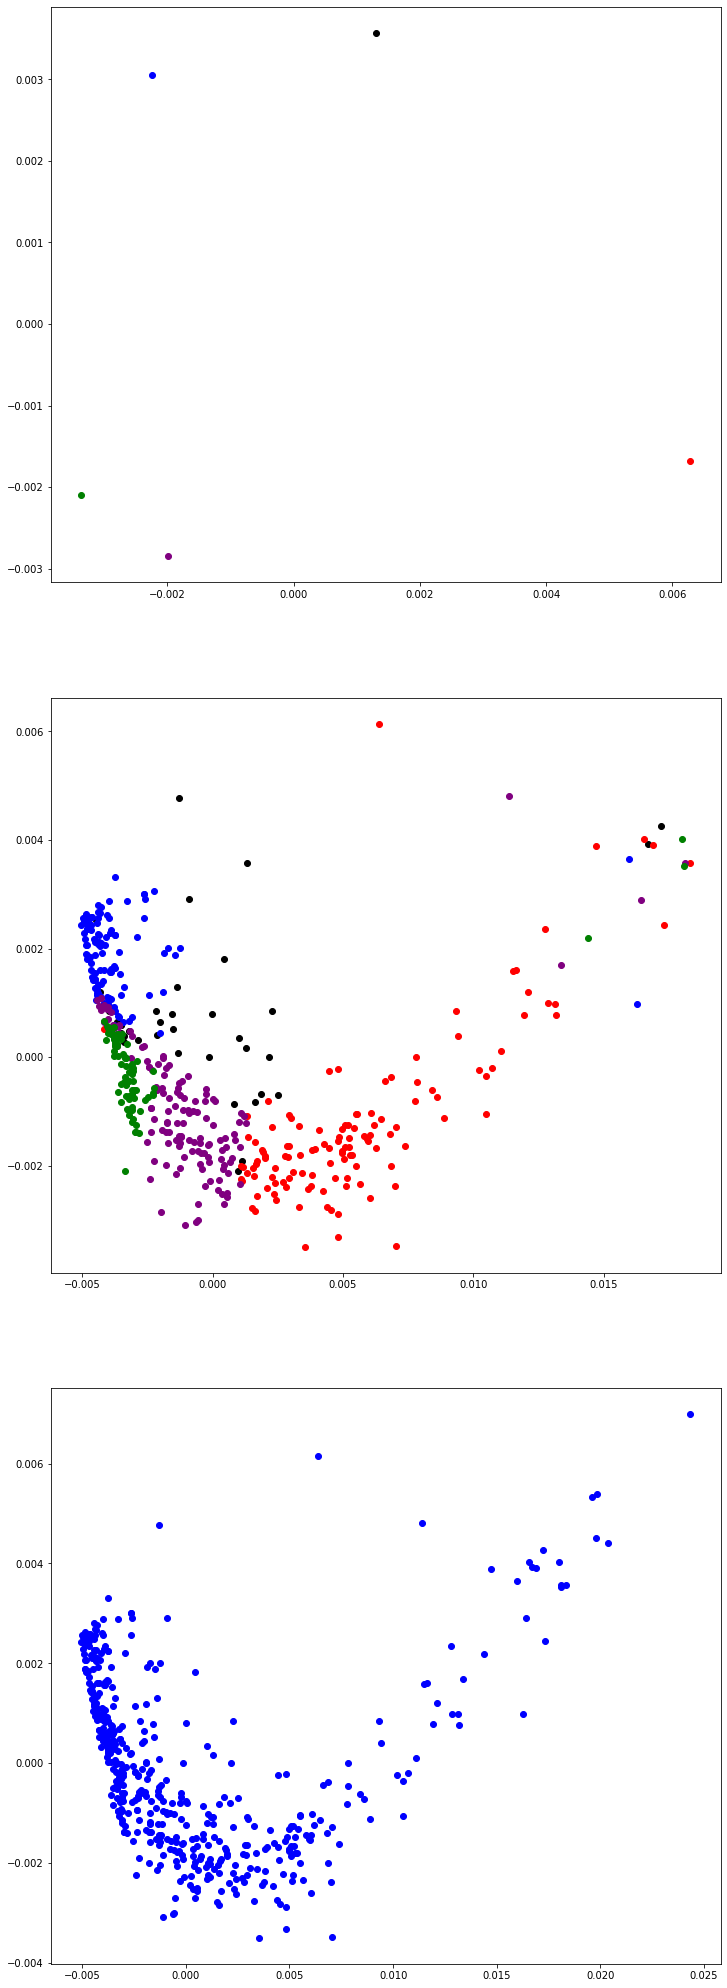

In [190]:
plt.figure(figsize=(12,36))
plt.subplot(3,1,1)
plt.plot(encode[label_==0,0][0],encode[label_==0,1][0],'o',color='black')
plt.plot(encode[label_==1,0][0],encode[label_==1,1][0],'o',color='red')
plt.plot(encode[label_==2,0][0],encode[label_==2,1][0],'o',color='blue')
plt.plot(encode[label_==3,0][0],encode[label_==3,1][0],'o',color='purple')
plt.plot(encode[label_==4,0][0],encode[label_==4,1][0],'o',color='green')
plt.subplot(3,1,2)
# print(unlabel_pca[label_==0,0])
plt.plot(encode[label_==0,0],encode[label_==0,1],'o',color='black')
plt.plot(encode[label_==1,0],encode[label_==1,1],'o',color='red')
plt.plot(encode[label_==2,0],encode[label_==2,1],'o',color='blue')
plt.plot(encode[label_==3,0],encode[label_==3,1],'o',color='purple')
plt.plot(encode[label_==4,0],encode[label_==4,1],'o',color='green')
plt.subplot(3,1,3)
plt.plot(encode_origin[:,0],encode_origin[:,1],'o',color='blue')

In [163]:
encode[label==0]

array([], shape=(0, 110, 2), dtype=float32)

In [99]:
print(label_)

[0 1 2 3 4 4 2 0 3 1 1 3 4 3 0 0 2 1 2 4 1 0 1 1 0 0 0 4 4 2 3 2 1 4 0 1 4
 0 4 3 1 4 1 2 2 4 4 1 1 3 2 4 2 4 1 1 1 0 1 4 1 1 4 4 4 3 1 1 4 2 4 4 0 0
 1 1 1 1 4 3 4 2 1 0 1 4 3 1 0 4 4 4 4 4 4 0 1 1 4 0 1 2 4 3 4 4 0 4 0 3 4
 2 0 0 2 4 1 3 1 1 1 0 0 0 0 1 4 2 1 0 4 1 4 1 4 0 1 3 4 4 4 4 1 4 4 1 2 4
 3 2 2 4 1 1 3 3 4 4 4 4 1 1 4 3 1 1 1 4 1 1 4 4 3 0 0 1 1 0 0 4 4 4 3 1 1
 3 1 1 1 4 4 0 4 2 1 1 4 3 1 1 1 1 1 3 1 0 1 4 1 4 1 1 1 4 1 4 4 4 4 3 1 0
 1 4 4 4 4 0 3 1 0 1 0 1 0 1 4 1 4 4 1 1 4 4 4 3 4 3 4 1 4 1 1 1 0 1 0 1 1
 4 3 0 3 1 4 1 4 3 1 1 1 1 3 4 1 1 4 1 0 0 4 3 4 4 4 4 4 3 4 3 1 4 1 4 0 4
 2 2 3 4 4 2 4 3 4 3 1 4 0 2 0 4 3 4 2 3 0 4 1 4 3 2 1 4 2 1 4 1 4 4 4 1 4
 4 2 1 2 1 3 1 4 2 4 1 3 1 0 3 4 1 1 2 1 4 0 0 0 4 3 4 1 0 4 1 2 0 4 2 4 4
 2 1 0 4 1 1 3 1 4 2 1 0 2 4 1 3 1 0 1 4 1 2 1 0 4 2 4 1 4 4]


In [94]:
np.shape(label_)

(400,)

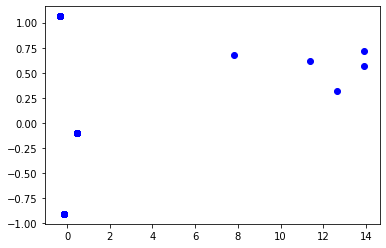

In [77]:
plt.plot(unlabel_pca[:,0],unlabel_pca[:,1],'o',color='blue')

In [78]:
label_ = label_[0]

In [79]:
pca = PCA(n_components = 2)
Train_X = Train_X.reshape(400,992)

In [80]:
unlabel_pca = pca.fit_transform(Train_X)
print(unlabel_pca)

[[11.37021995  0.61509987]
 [13.91841553  0.71494593]
 [12.62859954  0.31561091]
 [ 7.83568824  0.67945245]
 [13.92457328  0.57065851]
 [-0.14360963 -0.9076196 ]
 [-0.3285408   1.0636914 ]
 [-0.14360963 -0.9076196 ]
 [ 0.45654943 -0.10180646]
 [-0.3285408   1.0636914 ]
 [-0.3285408   1.0636914 ]
 [ 0.45654943 -0.10180646]
 [-0.14360963 -0.9076196 ]
 [ 0.45654943 -0.10180646]
 [-0.14360963 -0.9076196 ]
 [-0.14360963 -0.9076196 ]
 [-0.3285408   1.0636914 ]
 [-0.3285408   1.0636914 ]
 [-0.3285408   1.0636914 ]
 [-0.14360963 -0.9076196 ]
 [-0.3285408   1.0636914 ]
 [-0.14360963 -0.9076196 ]
 [-0.3285408   1.0636914 ]
 [-0.3285408   1.0636914 ]
 [-0.14360963 -0.9076196 ]
 [-0.14360963 -0.9076196 ]
 [-0.14360963 -0.9076196 ]
 [-0.14360963 -0.9076196 ]
 [-0.14360963 -0.9076196 ]
 [-0.3285408   1.0636914 ]
 [ 0.45654943 -0.10180646]
 [-0.3285408   1.0636914 ]
 [-0.3285408   1.0636914 ]
 [-0.14360963 -0.9076196 ]
 [-0.14360963 -0.9076196 ]
 [-0.3285408   1.0636914 ]
 [-0.14360963 -0.9076196 ]
 

[11.37021995 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963
 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963
 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963
 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963
 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963
 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963
 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963
 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963
 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963 -0.14360963
 -0.14360963 -0.14360963 -0.14360963]


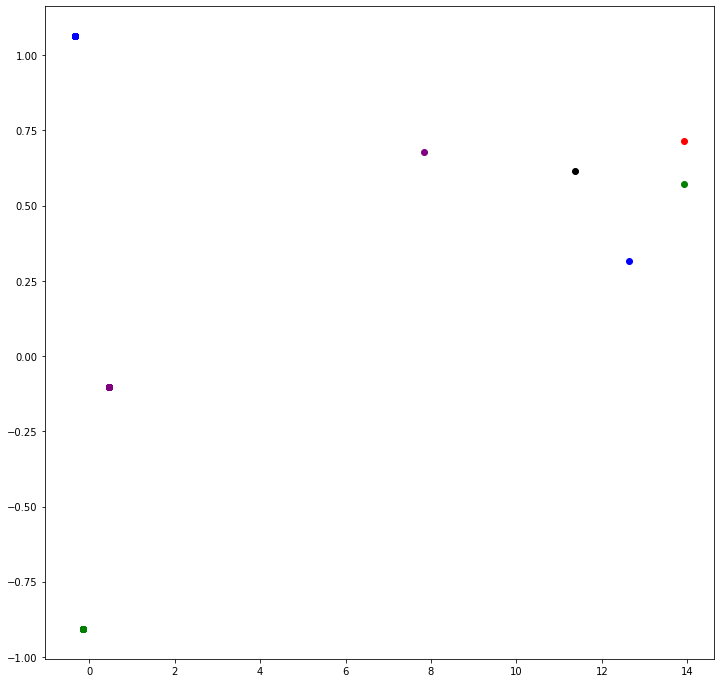

In [155]:
plt.figure(figsize=(12,12))
print(unlabel_pca[label_==0,0])
plt.plot(unlabel_pca[label_==0,0],unlabel_pca[label_==0,1],'o',color='black')
plt.plot(unlabel_pca[label_==1,0],unlabel_pca[label_==1,1],'o',color='red')
plt.plot(unlabel_pca[label_==2,0],unlabel_pca[label_==2,1],'o',color='blue')
plt.plot(unlabel_pca[label_==3,0],unlabel_pca[label_==3,1],'o',color='purple')
plt.plot(unlabel_pca[label_==4,0],unlabel_pca[label_==4,1],'o',color='green')